# ML - Regression for 4 SiPM with 220MeV neutrons (x,y)=(0,0) (halfx,halfy)=(22,22), SiPM at (x,y)=(-25,-25),(-25,25),(25,25),(25,-25)

In [1]:
# Load libraries
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
#Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
#Metrics Class.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Metrics Regr.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Data Sets
from sklearn.datasets import fetch_california_housing

Loading dataset and printing description

In [2]:
df = pd.read_csv('neutron_2D.csv')
print(df)

             vx         vy        vz  sci_photons  xpos0  ypos0  photons0  \
0      13.40630   6.593520 -1.199740       148549  -25.0  -25.0       169   
1      14.42390  16.558700 -2.465850           42  -99.9  -99.9        -1   
2     -20.53600   0.900926  9.016200           48  -99.9  -99.9        -1   
3      21.63870   3.864990  5.260160         5336  -25.0  -25.0         5   
4     -20.51870   7.291970 -4.084690        24607  -25.0  -25.0        44   
...         ...        ...       ...          ...    ...    ...       ...   
15206  14.85950 -11.589600  5.968430        37288  -25.0  -25.0        54   
15207  20.54630   7.846140 -2.182260        11206  -25.0  -25.0        14   
15208   5.06071 -15.484800 -3.675110        89887  -25.0  -25.0       150   
15209 -20.83200  -8.694480  4.948350           56  -99.9  -99.9        -1   
15210  19.23700  -0.882388  0.388034        59501  -25.0  -25.0        79   

       xpos1  ypos1  photons1  xpos2  ypos2  photons2  xpos3  ypos3  photon

In [3]:
df.head(10)

vx         vy       vz  sci_photons  xpos0  ypos0  photons0  xpos1  \
0  13.40630   6.593520 -1.19974       148549  -25.0  -25.0       169  -25.0   
1  14.42390  16.558700 -2.46585           42  -99.9  -99.9        -1  -99.9   
2 -20.53600   0.900926  9.01620           48  -99.9  -99.9        -1  -99.9   
3  21.63870   3.864990  5.26016         5336  -25.0  -25.0         5  -25.0   
4 -20.51870   7.291970 -4.08469        24607  -25.0  -25.0        44  -25.0   
5  -1.28323  -3.391520 -5.29498        35137  -25.0  -25.0        65  -25.0   
6   5.45484 -13.528200  2.32637        14165  -25.0  -25.0        26  -25.0   
7  21.07150 -17.349000 -2.36026         5903  -25.0  -25.0         8  -25.0   
8   6.87959 -12.746700  4.06340         1307  -25.0  -25.0        12  -25.0   
9  -2.30892  -8.332710 -3.01018        13687  -25.0  -25.0        20  -25.0   

   ypos1  photons1  xpos2  ypos2  photons2  xpos3  ypos3  photons3  
0   25.0       179   25.0  -25.0       251   25.0   25.0       383  
1  -99.9        -1  -99.9  -99.9        -1  -99.9  -99.9        -1  
2  -99.9        -1  -99.9  -99.9        -1  -99.9  -99.9        -1  
3   25.0         5   25.0  -25.0        17   25.0   25.0        12  
4   25.0        72   25.0  -25.0        28   25.0   25.0        35  
5   25.0        54   25.0  -25.0        61   25.0   25.0        64  
6   25.0        14   25.0  -25.0        33   25.0   25.0        17  
7   25.0        12   25.0  -25.0        38   25.0   25.0        10  
8   25.0         2   25.0  -25.0         1   25.0   25.0         3  
9   25.0        20   25.0  -25.0        24   25.0   25.0        21

Display the type of variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15211 entries, 0 to 15210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vx           15211 non-null  float64
 1   vy           15211 non-null  float64
 2   vz           15211 non-null  float64
 3   sci_photons  15211 non-null  int64  
 4   xpos0        15211 non-null  float64
 5   ypos0        15211 non-null  float64
 6   photons0     15211 non-null  int64  
 7   xpos1        15211 non-null  float64
 8   ypos1        15211 non-null  float64
 9   photons1     15211 non-null  int64  
 10  xpos2        15211 non-null  float64
 11  ypos2        15211 non-null  float64
 12  photons2     15211 non-null  int64  
 13  xpos3        15211 non-null  float64
 14  ypos3        15211 non-null  float64
 15  photons3     15211 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 1.9 MB


In [5]:
#Remove unwanted rows
df = df[df['photons0'] >= 10]
df = df[df['photons1'] >= 10]
df = df[df['photons2'] >= 10]
df = df[df['photons3'] >= 10]

In [6]:
#scatter_matrix(df)
#plt.rcParams["figure.figsize"] = (20,20)
#plt.show()

In [7]:
#feature engineering
df['frac_photon0'] = df['photons0']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
df['frac_photon1'] = df['photons1']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
df['frac_photon2'] = df['photons2']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
df['frac_photon3'] = df['photons3']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
df['frac_XL'] = (df['photons0']+df['photons1'])/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
df['frac_XR'] = (df['photons2']+df['photons3'])/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
df['frac_YU'] = (df['photons1']+df['photons3'])/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
df['frac_YD'] = (df['photons0']+df['photons2'])/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
#df['posXfrac_photon0'] = df['xpos0']*df['photons0']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
#df['posXfrac_photon1'] = df['xpos1']*df['photons1']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
#df['posXfrac_photon2'] = df['xpos2']*df['photons2']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
#df['posXfrac_photon3'] = df['xpos3']*df['photons3']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
#df['posYfrac_photon0'] = df['ypos0']*df['photons0']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
#df['posYfrac_photon1'] = df['ypos1']*df['photons1']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
#df['posYfrac_photon2'] = df['ypos2']*df['photons2']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])
#df['posYfrac_photon3'] = df['ypos3']*df['photons3']/(df['photons0']+df['photons1']+df['photons2']+df['photons3'])

In [8]:
# Drop the unwanted columns
columns_drop = ["xpos0","ypos0","xpos1","ypos1","xpos2","ypos2","xpos3","ypos3","sci_photons"]
subset = df.drop(columns=columns_drop)
subset_feature = subset.drop(columns=["vx","vy","vz"])
print(subset)

             vx         vy        vz  photons0  photons1  photons2  photons3  \
0      13.40630   6.593520 -1.199740       169       179       251       383   
4     -20.51870   7.291970 -4.084690        44        72        28        35   
5      -1.28323  -3.391520 -5.294980        65        54        61        64   
6       5.45484 -13.528200  2.326370        26        14        33        17   
9      -2.30892  -8.332710 -3.010180        20        20        24        21   
...         ...        ...       ...       ...       ...       ...       ...   
15204 -15.53650   8.794640  2.731590       128       212        82       110   
15206  14.85950 -11.589600  5.968430        54        44        92        60   
15207  20.54630   7.846140 -2.182260        14        10        24        30   
15208   5.06071 -15.484800 -3.675110       150       107       211       109   
15210  19.23700  -0.882388  0.388034        79        81       137       137   

       frac_photon0  frac_photon1  frac

In [9]:
#_ = sns.pairplot(data=subset, hue="vx", palette="viridis")

In [10]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7647 entries, 0 to 15210
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vx            7647 non-null   float64
 1   vy            7647 non-null   float64
 2   vz            7647 non-null   float64
 3   photons0      7647 non-null   int64  
 4   photons1      7647 non-null   int64  
 5   photons2      7647 non-null   int64  
 6   photons3      7647 non-null   int64  
 7   frac_photon0  7647 non-null   float64
 8   frac_photon1  7647 non-null   float64
 9   frac_photon2  7647 non-null   float64
 10  frac_photon3  7647 non-null   float64
 11  frac_XL       7647 non-null   float64
 12  frac_XR       7647 non-null   float64
 13  frac_YU       7647 non-null   float64
 14  frac_YD       7647 non-null   float64
dtypes: float64(11), int64(4)
memory usage: 955.9 KB


Split data set between training and testing sets

In [11]:
#Array and Data Split
array = subset.values
# X corresponds to the last 2 columns (features)
X = array[:,3:27]
# y is the first column of our dataset (target)
y = array[:,0:2]
#Data Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Random Forrest

In [12]:
# Random Forrest
algo = RandomForestRegressor()
#create folds
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
# Define our candidate hyperparameters
max_features_range = np.arange(1,5,1)
n_estimators_range = np.arange(100,200,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)
# Search for best hyperparameters
grid = GridSearchCV(estimator=algo, param_grid=param_grid, cv=kfold, scoring='r2', verbose=4, n_jobs=2)
grid.fit(X_train, y_train)
# Get the results
#print(grid.best_score_)
#print(grid.best_estimator_)
#print(grid.best_params_)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[CV 1/3] END ..max_features=1, n_estimators=100;, score=0.845 total time=   0.9s
[CV 2/3] END ..max_features=1, n_estimators=100;, score=0.844 total time=   1.0s
[CV 3/3] END ..max_features=1, n_estimators=100;, score=0.851 total time=   0.8s
[CV 1/3] END ..max_features=1, n_estimators=110;, score=0.845 total time=   0.8s
[CV 2/3] END ..max_features=1, n_estimators=110;, score=0.844 total time=   0.9s
[CV 3/3] END ..max_features=1, n_estimators=110;, score=0.851 total time=   0.9s
[CV 1/3] END ..max_features=1, n_estimators=120;, score=0.846 total time=   0.9s
[CV 2/3] END ..max_features=1, n_estimators=120;, score=0.843 total time=   0.9s
[CV 3/3] END ..max_features=1, n_estimators=120;, score=0.851 total time=   0.9s
[CV 1/3] END ..max_features=1, n_estimators=130;, score=0.845 total time=   1.0s
[CV 2/3] END ..max_features=1, n_estimators=130;, score=0.843 total time=   1.0s
[CV 3/3] END ..max_features=1, n_estimators=130;, score=0.852 total time=   1.0s
[CV 1/3] END ..max_features=

In [13]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["r2"])],axis=1)
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'r2']
grid_pivot = grid_reset.pivot(index='max_features', columns='n_estimators')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values
# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [14]:
n_estimators_best = grid.cv_results_['param_n_estimators'][grid.best_index_]
max_features_best = grid.cv_results_['param_max_features'][grid.best_index_]
model = RandomForestRegressor(max_features=max_features_best, n_estimators=n_estimators_best)
model.fit(X_train,y_train)
res = model.predict(X_test)

In [15]:
#Mean Squared Error (MSE)
print(mean_squared_error(res,y_test))

23.962527903730233


In [16]:
#Root Mean Squared Error (RMSE)
print(mean_squared_error(res,y_test,squared=False))

4.891831907582814


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [17]:
#Mean Absolute Error (MAE)
print(mean_absolute_error(res,y_test))

3.5710640456334115


In [18]:
df_test = pd.DataFrame(y_test, columns =['testX','testY'])
df_pred = pd.DataFrame(res, columns =['predX','predY'])
df_res = pd.concat([df_test,df_pred],axis=1)
print(df_res)

          testX      testY      predX      predY
0    -10.626500 -16.280300  -6.091329 -12.267795
1    -17.912300 -16.704100 -11.995550 -17.659826
2     16.309100 -14.849900  17.278235   3.871015
3    -20.750000 -18.225300 -15.307126 -12.674535
4     -4.385490 -14.498300  -5.256452   3.198921
...         ...        ...        ...        ...
1525  -2.829490  17.285000  -1.770935  17.762857
1526  -0.292784  17.779100   0.092730  12.023809
1527  -1.842430   0.589356  -0.817784   8.237808
1528  15.059900  15.005300  17.186636  13.722770
1529  16.337000   8.530280   7.915214   7.316149

[1530 rows x 4 columns]


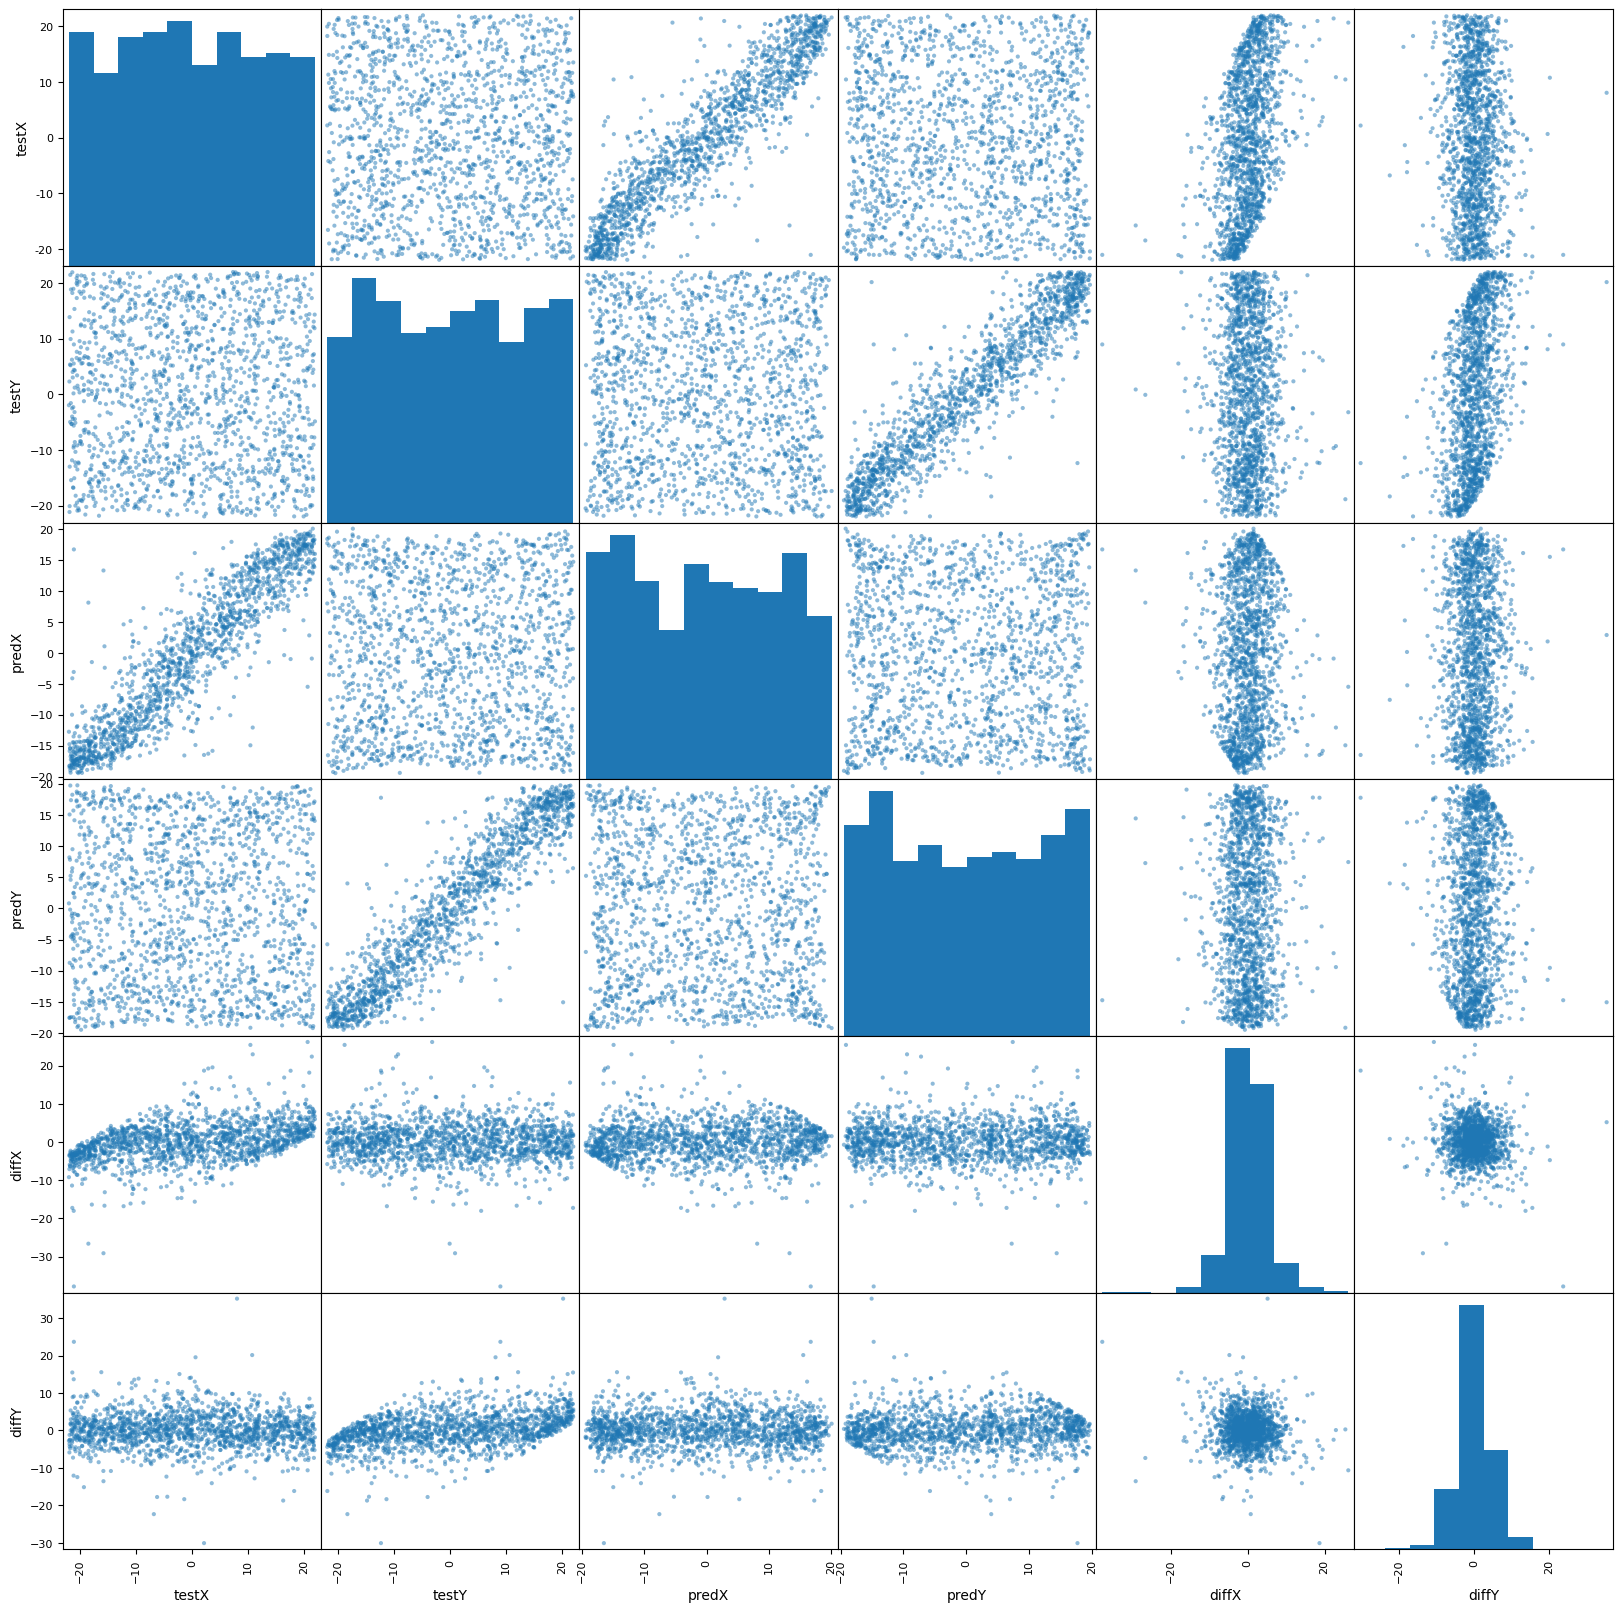

In [24]:
df_res['diffX'] = df_res['testX']-df_res['predX']
df_res['diffY'] = df_res['testY']-df_res['predY']
scatter_matrix(df_res)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

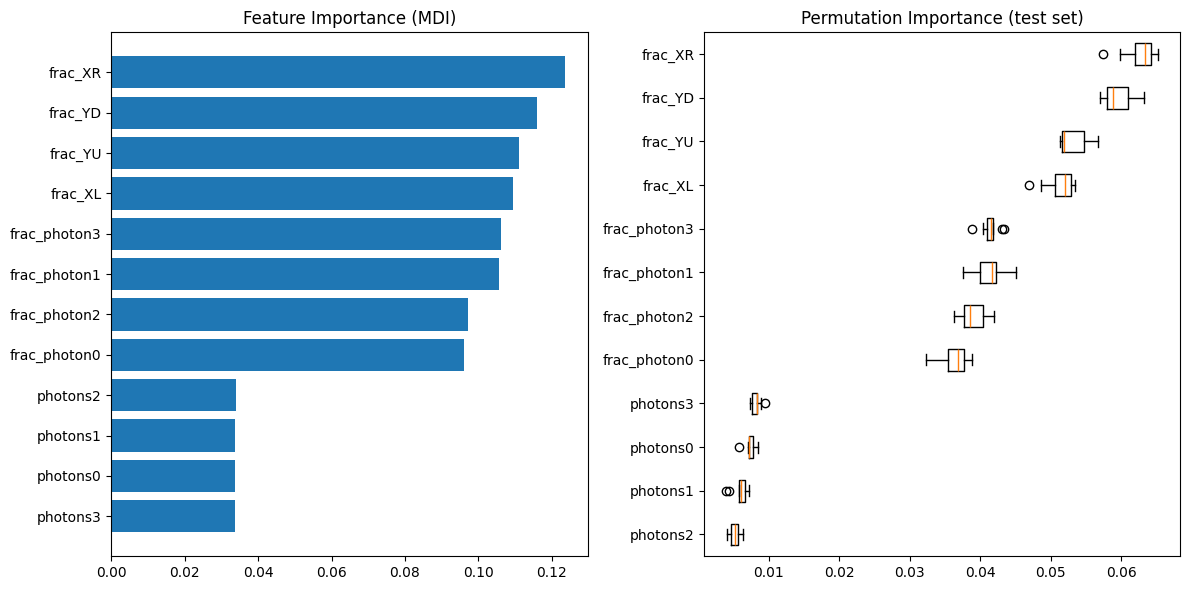

In [20]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
column_headers = list(subset_feature.columns.values)
plt.yticks(pos, np.array(column_headers)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(column_headers)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [21]:
df_res.describe()

testX        testY        predX        predY        diffX  \
count  1530.000000  1530.000000  1530.000000  1530.000000  1530.000000   
mean     -0.220810     0.119523    -0.368512    -0.024675     0.147702   
std      12.579750    12.755307    11.447716    11.697682     5.071640   
min     -21.952500   -21.948800   -19.447584   -19.468599   -37.778797   
25%     -10.975975   -11.374425   -10.972966   -10.790808    -2.810953   
50%      -0.430001     0.133896    -0.324461    -0.182989     0.086630   
75%      10.472050    11.201575     9.943040    10.653668     2.977038   
max      21.981500    21.977600    20.065356    19.714676    26.167648   

             diffY  
count  1530.000000  
mean      0.144198  
std       4.710863  
min     -30.088079  
25%      -2.467965  
50%       0.070975  
75%       2.811844  
max      35.220330

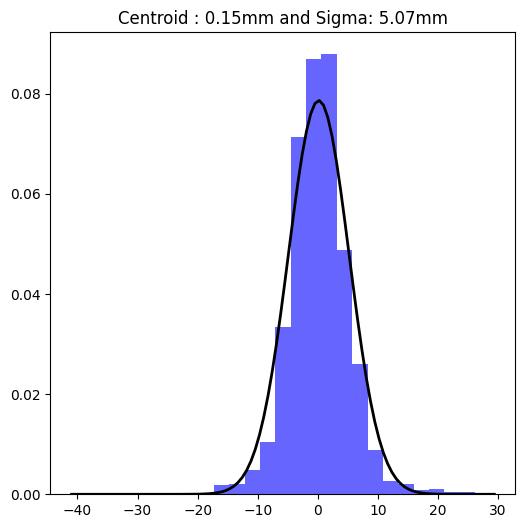

In [22]:
from scipy.stats import norm

fig = plt.figure(figsize=(6, 6))

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(df_res['diffX']) 
 
# Plot the histogram.
plt.hist(df_res['diffX'], bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
 
plt.plot(x, p, 'k', linewidth=2)
title = "Centroid : {:.2f}mm and Sigma: {:.2f}mm".format(mu, std)
plt.title(title)
 
plt.show()

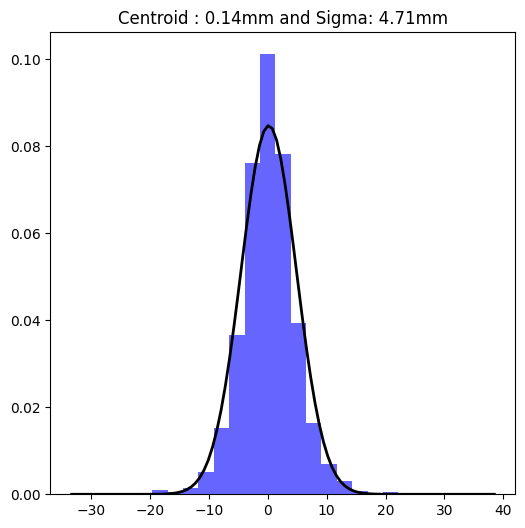

In [23]:
from scipy.stats import norm

fig = plt.figure(figsize=(6, 6))

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(df_res['diffY']) 
 
# Plot the histogram.
plt.hist(df_res['diffY'], bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
 
plt.plot(x, p, 'k', linewidth=2)
title = "Centroid : {:.2f}mm and Sigma: {:.2f}mm".format(mu, std)
plt.title(title)
 
plt.show()